# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [84]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [85]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [86]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [87]:
# Create a Beautiful Soup Object
html= browser.html
soup= soup(html, 'html.parser')

In [88]:
# Extract all rows of data
 
rows=soup.find_all('tr', class_='data-row') 
print(rows)    

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [89]:
# Create an empty list to store rows
data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    td_elements = row.find_all('td')
    
    if td_elements:
        row_values = [td.text.strip() for td in td_elements]
        data.append(row_values)




In [90]:
# Column names
columns = ['id', 'terrestrial_date', 'Sol', 'LS', 'month', 'Min_Temp', 'Pressure']

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=columns)

data.append(row_values)



In [91]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,Sol,LS,month,Min_Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [92]:
# Examine data type of each column
for column in columns:
    print(f"{column}: {df[column].dtype}")

id: object
terrestrial_date: object
Sol: object
LS: object
month: object
Min_Temp: object
Pressure: object


In [93]:
# Change data types for data analysis

df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])  # Convert to datetime
df['Sol'] = df['Sol'].astype(int)
df['LS'] = df['LS'].astype(int)
df['month'] = df['month'].astype(int)
df['Min_Temp'] = df['Min_Temp'].astype(float)
df['Pressure'] = df['Pressure'].astype(float)


In [94]:
# Confirm type changes were successful by examining data types again
for column in columns:
    print(f"{column}: {df[column].dtype}")

id: object
terrestrial_date: datetime64[ns]
Sol: int32
LS: int32
month: int32
Min_Temp: float64
Pressure: float64


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [109]:
# 1. How many months are there on Mars?
unique_months = df['month'].nunique()
print(unique_months)

12


In [132]:
# 2. How many Martian days' worth of data are there?
day = df['Sol'].nunique()
print(day)

1867


In [117]:
# 3. What is the average low temperature by month?
avg_low_temp= df.groupby('month')['Min_Temp'].mean()
avg_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: Min_Temp, dtype: float64

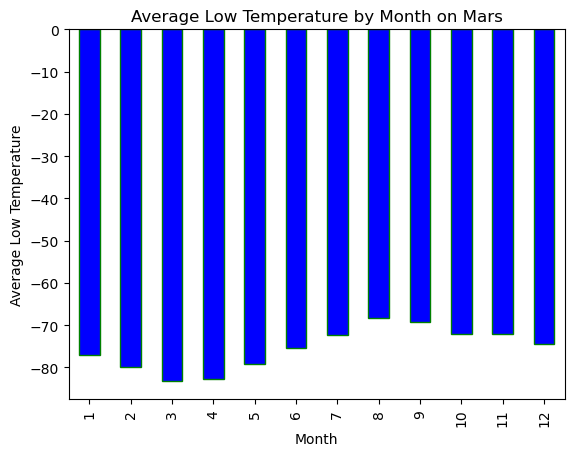

In [118]:
# Plot the average temperature by month
avg_low_temp.plot(kind='bar', color='blue', edgecolor='green')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Average Low Temperature')
plt.title('Average Low Temperature by Month on Mars')

# Show the plot
plt.show()

In [128]:
# Identify the coldest and hottest months in Curiosity's location
#Max and Min
max_temp= avg_low_temp.max()
min_temp= avg_low_temp.min()
#Months
month_max_temp= avg_low_temp.idxmax()
month_min_temp= avg_low_temp.idxmin()

print(f"hottest month: {month_max_temp}:{max_temp}")
print(f"coldest month: {month_min_temp}:{min_temp}")

hottest month: 8:-68.38297872340425
coldest month: 3:-83.30729166666667


In [130]:
# 4. Average pressure by Martian month
avg_pressure= df.groupby('month')['Pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: Pressure, dtype: float64

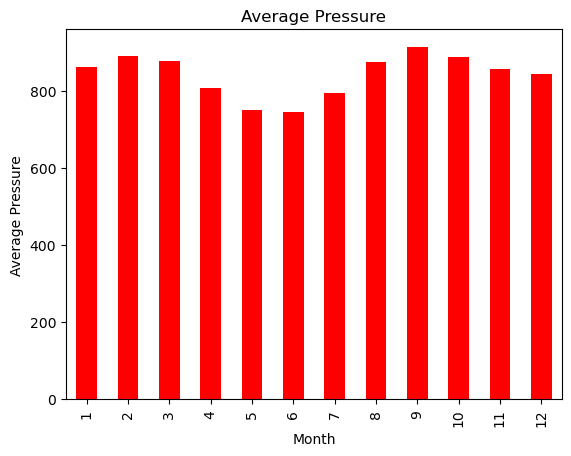

In [134]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', color='red')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure')

# Show the plot
plt.show()

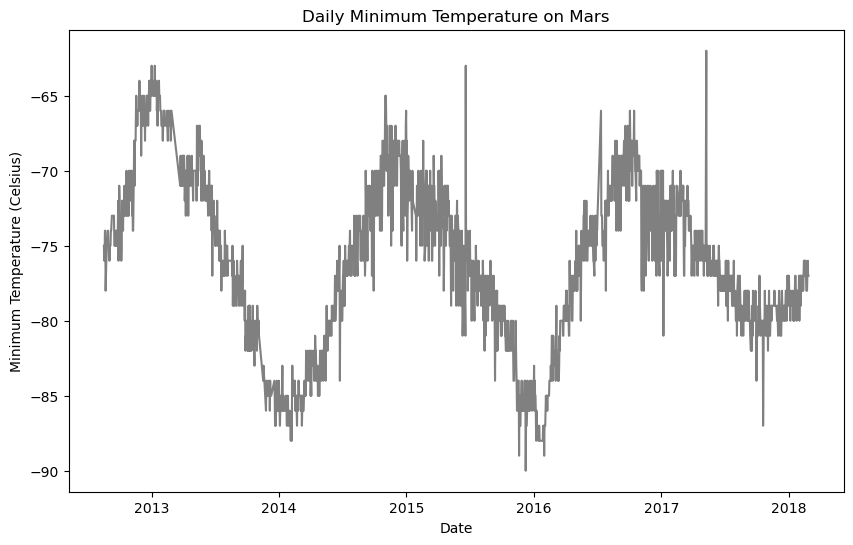

In [152]:
# 5. How many terrestrial (earth) days are there in a Martian year?
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Plot the daily minimum temperature
plt.figure(figsize=(10, 6))
plt.plot(df['terrestrial_date'], df['Min_Temp'], color='gray')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Minimum Temperature (Celsius)')
plt.title('Daily Minimum Temperature on Mars')

plt.show()

In [163]:
sorted_df = df.sort_values(by='Min_Temp', ascending=False)
sorted_df



,id,terrestrial_date,Sol,LS,month,Min_Temp,Pressure
1582,1614,2017-05-10,1692,2,1,-62.0,820.0
926,938,2015-06-20,1020,0,1,-63.0,832.0
138,60,2013-01-09,152,241,9,-63.0,914.0
129,50,2012-12-31,143,235,8,-63.0,908.0
95,12,2012-11-26,109,213,8,-64.0,844.0
...,...,...,...,...,...,...,...
1139,1166,2016-01-26,1234,99,4,-88.0,824.0
1142,1169,2016-01-29,1237,101,4,-88.0,820.0
1144,1168,2016-01-31,1239,102,4,-89.0,818.0
1074,1100,2015-11-20,1169,70,3,-89.0,894.0


In [170]:
# Extract the first two rows with the max temperatures
warmest_date = sorted_df['terrestrial_date'].iloc[0]
second_warmest_date = sorted_df['terrestrial_date'].iloc[1]

#Earth Days
earth_days= (warmest_date-second_warmest_date).days

print(f"The warmest dates are: {warmest_date} and {second_warmest_date}, which results in aprox {earth_days} days")


The warmest dates are: 2017-05-10 00:00:00 and 2015-06-20 00:00:00, which results in aprox 690 days


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [171]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)

In [ ]:
browser.quit()